In [166]:
from tensorflow.keras.datasets import mnist

In [167]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [168]:
print("training set image: %d pieces" % (X_train.shape[0]))
print("test set image: %d pieces" % (X_test.shape[0]))

training set image: 60000 pieces
test set image: 10000 pieces


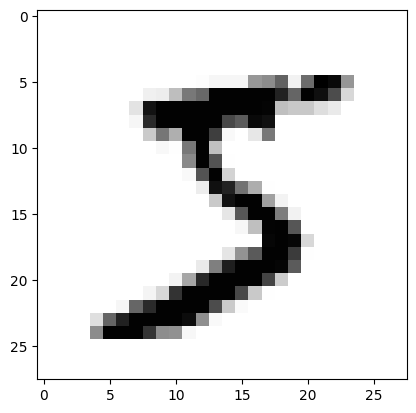

In [169]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="Greys")
plt.show()

In [170]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [171]:
# X_train = X_train.astype('float64')
# X_train = X_train / 255

In [172]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') /255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') /255

In [173]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [174]:
Y_train = tf.keras.utils.to_categorical(Y_class_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_class_test, 10)

In [175]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [176]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
modelpath = "model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200,
                    callbacks=[early_stopping_callback, checkpointer])

# Convert history to DataFrame
hist = pd.DataFrame(history.history)

Epoch 1/30
273/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8045 - loss: 0.7333
Epoch 1: val_loss improved from inf to 0.20564, saving model to model/01-0.2056.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8124 - loss: 0.7032 - val_accuracy: 0.9413 - val_loss: 0.2056
Epoch 2/30
263/300 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.9430 - loss: 0.1999
Epoch 2: val_loss improved from 0.20564 to 0.14865, saving model to model/02-0.1487.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9437 - loss: 0.1975 - val_accuracy: 0.9564 - val_loss: 0.1487
Epoch 3/30
256/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9599 - loss: 0.1423
Epoch 3: val_loss improved from 0.14865 to 0.11951, saving model to model/03-0.1195.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9602 - loss: 0.1408 - val_accuracy: 0.9642 - val_loss: 0.1195
Epoch 4/30
297/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9695 - loss: 0.1099
Epoch 4: val_loss improved from 0.119

    accuracy      loss  val_accuracy  val_loss
19  0.999133  0.008798        0.9804  0.072833
20  0.999400  0.007555        0.9800  0.073952
21  0.999567  0.006493        0.9801  0.074717
22  0.999700  0.005591        0.9798  0.076007
23  0.999833  0.004828        0.9797  0.076719


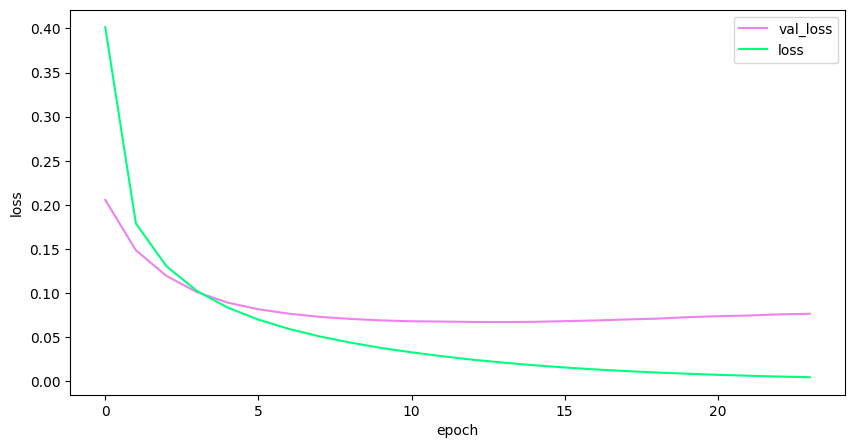

In [177]:
print(hist.tail())
y_vloss=history.history['val_loss']
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_loss=history.history['loss']
import matplotlib.pyplot as plt
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_loss))
plt. figure(figsize=(10, 5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(x_len, y_vloss, "-", c="violet", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "-", c="springgreen", markersize=3, label='loss')
plt.legend()
plt.show()

In [178]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.9761 - loss: 0.0898

 Test Accuracy: 0.9797
